In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
readIn = pd.read_csv("train.csv")
df = pd.DataFrame(readIn)
readIn = pd.read_csv("test.csv")
df_test = pd.DataFrame(readIn)
readIn = pd.read_csv("sample_submission.csv")
df_sample = pd.DataFrame(readIn)

In [3]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
len(df['CustomerId'].unique())

23221

In [5]:
df['CustomerId'].value_counts()

CustomerId
15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
           ... 
15635203      1
15806982      1
15691104      1
15624936      1
15815050      1
Name: count, Length: 23221, dtype: int64

In [6]:
df[df['CustomerId']==15585835]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
164,164,15585835,O'Brien,723,France,Female,41.0,6,0.00,2,1.0,1.0,64375.40,0
1383,1383,15585835,Chibugo,594,France,Female,39.0,3,0.00,1,1.0,0.0,45909.62,1
1405,1405,15585835,Rowley,675,Spain,Female,44.0,8,179356.28,2,1.0,1.0,2919.21,1
1891,1891,15585835,Onyenachiya,695,France,Male,42.0,5,141804.00,1,1.0,0.0,9086.84,0
2309,2309,15585835,White,775,France,Male,33.0,4,0.00,2,0.0,1.0,128841.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151909,151909,15585835,White,682,France,Female,21.0,2,0.00,2,1.0,1.0,172495.83,0
156271,156271,15585835,Lo,543,Germany,Female,42.0,1,103399.28,2,1.0,0.0,74850.97,1
161844,161844,15585835,Thompson,622,Spain,Female,36.0,5,96196.24,1,1.0,0.0,181419.29,0
162294,162294,15585835,Lucchesi,706,France,Male,32.0,3,0.00,2,1.0,0.0,80190.02,0


In [7]:
dummy_cols=[]

def dummy_creator(df, column, dummy_col):

  ps_dummies = pd.get_dummies(df[column], prefix = column, drop_first = True)


  dummy_col.append(ps_dummies.columns)

  df = df.merge(ps_dummies, left_index = True, right_index = True, how = 'left')

  return df, dummy_col

## Columns

In [8]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### id

In [9]:
len(df['id'])/len(df['id'].unique())

1.0

## CustomerId

In [10]:
del df['CustomerId']

# Surname

In [11]:
del df['Surname']

# CreditScore

<Axes: >

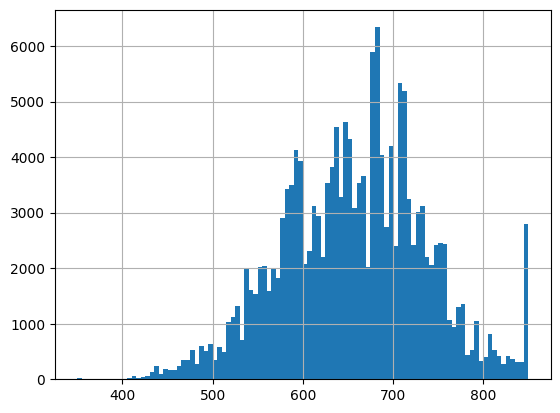

In [12]:
df['CreditScore'].hist(bins=100)

# Geography

In [13]:
df, dummy_cols= dummy_creator(df, 'Geography', dummy_cols)

In [14]:
del df['Geography']

In [15]:
df

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False
1,1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False
2,2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False
3,3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False
4,4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,True
165030,165030,792,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,False,False
165031,165031,565,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,False,False
165032,165032,554,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,True


# Gender

In [16]:
df['Is_Male']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [17]:
del df['Gender']

# Age

<Axes: >

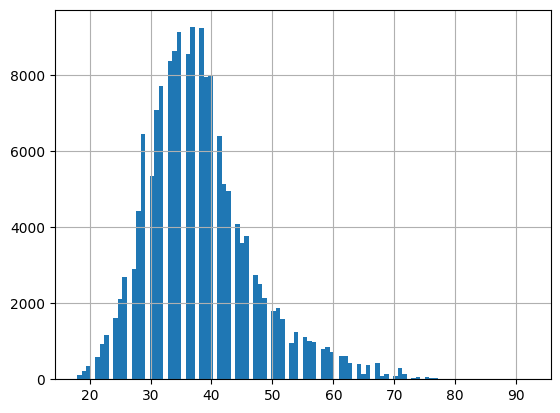

In [18]:
df['Age'].hist(bins=100)

# Tenure

In [19]:
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

# Balance

# Num of products

# HasCrCard

In [20]:
df['HasCrCard']=df['HasCrCard'].astype(int)

In [21]:
df

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Is_Male
0,0,668,33.0,3,0.00,2,1,0.0,181449.97,0,False,False,1
1,1,627,33.0,1,0.00,2,1,1.0,49503.50,0,False,False,1
2,2,678,40.0,10,0.00,2,1,0.0,184866.69,0,False,False,1
3,3,581,34.0,2,148882.54,1,1,1.0,84560.88,0,False,False,1
4,4,716,33.0,5,0.00,2,1,1.0,15068.83,0,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,33.0,2,0.00,1,1,1.0,131834.75,0,False,True,0
165030,165030,792,35.0,3,0.00,1,0,0.0,131834.45,0,False,False,1
165031,165031,565,31.0,5,0.00,1,1,1.0,127429.56,0,False,False,1
165032,165032,554,30.0,7,161533.00,1,0,1.0,71173.03,0,False,True,0


# IsActiveMember

In [22]:
df['IsActiveMember']=df['IsActiveMember'].astype(int)

# Estimated Salary

# Exited

In [23]:
df

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Is_Male
0,0,668,33.0,3,0.00,2,1,0,181449.97,0,False,False,1
1,1,627,33.0,1,0.00,2,1,1,49503.50,0,False,False,1
2,2,678,40.0,10,0.00,2,1,0,184866.69,0,False,False,1
3,3,581,34.0,2,148882.54,1,1,1,84560.88,0,False,False,1
4,4,716,33.0,5,0.00,2,1,1,15068.83,0,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,33.0,2,0.00,1,1,1,131834.75,0,False,True,0
165030,165030,792,35.0,3,0.00,1,0,0,131834.45,0,False,False,1
165031,165031,565,31.0,5,0.00,1,1,1,127429.56,0,False,False,1
165032,165032,554,30.0,7,161533.00,1,0,1,71173.03,0,False,True,0


In [24]:
df_x=df.drop('Exited', axis=1)
df_y=df['Exited']

In [25]:
df_x

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Is_Male
0,0,668,33.0,3,0.00,2,1,0,181449.97,False,False,1
1,1,627,33.0,1,0.00,2,1,1,49503.50,False,False,1
2,2,678,40.0,10,0.00,2,1,0,184866.69,False,False,1
3,3,581,34.0,2,148882.54,1,1,1,84560.88,False,False,1
4,4,716,33.0,5,0.00,2,1,1,15068.83,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,33.0,2,0.00,1,1,1,131834.75,False,True,0
165030,165030,792,35.0,3,0.00,1,0,0,131834.45,False,False,1
165031,165031,565,31.0,5,0.00,1,1,1,127429.56,False,False,1
165032,165032,554,30.0,7,161533.00,1,0,1,71173.03,False,True,0


In [30]:
model=RandomForestClassifier()

In [47]:
param_grid = {
    'n_estimators': [90],
    'max_depth': [4,3],
    'min_samples_split': [ 6],
    'max_features': ['log2'],
}

In [48]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc')

In [49]:
grid_search.fit(df_x, df_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 3], 'max_features': ['log2'],
                         'min_samples_split': [6], 'n_estimators': [90]},
             scoring='roc_auc')

In [50]:
print("Legjobb hiperparaméter-kombináció:", grid_search.best_params_)
print("Legjobb roc_auc:", grid_search.best_score_)

Legjobb hiperparaméter-kombináció: {'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 90}
Legjobb roc_auc: 0.8742694483044895


In [54]:
model = LogisticRegression()

In [55]:
model.fit(df_x, df_y)

LogisticRegression()

In [57]:
predictions = model.predict(df_x)
accuracy = accuracy_score(df_y, predictions)


In [58]:
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.7884011779390914
